### Multinomial Naive Bayes

Create a multinomial Naive Bayes to add tags to articles, where tag reprsents categories that articles should belong to.
You will have access to training articles inside dictionary `MultinomialNB.articles_per_tag` mapping tags to the articles belonging to said tags

1. The laplacian smotthing hyperparameter has been choosen to be 1 which means when calculating likelihoods, you will be adding 2 to the denominator and 1 to numerator
2. If an input to the model contains a word that is not in the trained Naive Bayes Model, that word should be assigned a class probability of 50%
3. You should not use TF-IDF
4. Encouraged to use `collections` and `math` module

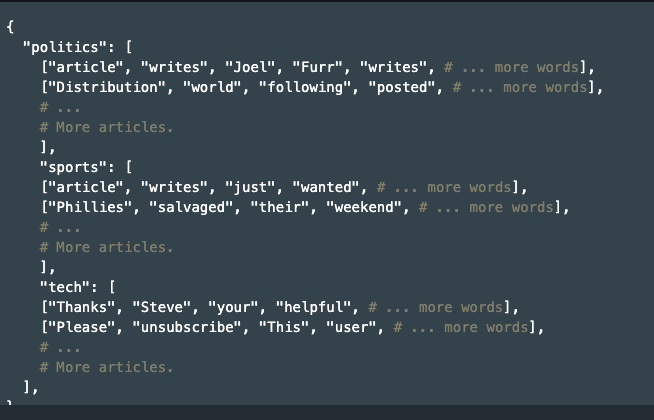

In [ ]:
from collections import defaultdict
import math

class MultinomialNB:
    def __init__(self, articles_per_tag):
        # Don't change the following two lines of code.
        self.alpha = 1
        self.priors_per_tag = {}
        self.likelihood_per_word_per_tag = {}
        self.articles_per_tag = articles_per_tag  # See question prompt for details.
        self.tags = self.articles_per_tag.keys()
        self.train()

    def train(self):
        # Write your code here.
        #1. count # of articles in  given tag / count # of articles across all tags
        tag_counts_map = {tag: len(self.articles_per_tag[tag]) for tag in self.tags}
        self.priors_per_tag = {tag: tag_counts_map[tag] / sum(tag_counts_map.values()) for tag in tag_counts_map.keys()}
        self.likelihood_per_word_per_tag = self.__get_word_likelihoods_per_tag()

    def predict(self, article):
        # Write your code here.
        posteriors_per_tag = {tag: math.log(prior) for tag, prior in self.priors_per_tag.items()}
        for word in article:
            for tag in self.tags:
                posteriors_per_tag[tag] = posteriors_per_tag[tag] + math.log(
                    self.likelihood_per_word_per_tag[word][tag]
                )
        return posteriors_per_tag

    def __get_word_likelihoods_per_tag(self):
        word_frequencies_per_tag = defaultdict(lambda: {tag: 0 for tag in self.tags})
        total_word_count_per_tag = defaultdict(int)
        for tag in self.tags:
            for article in self.articles_per_tag[tag]:
                for word in article:
                    word_frequencies_per_tag[word][tag] += 1
                    total_word_count_per_tag[tag] += 1
        word_likelihood_per_tag = defaultdict(lambda: {tag: 0.5 for tag in self.tags})
        for word, tags_map in word_frequencies_per_tag.items():
            for tag in tags_map.keys():
                word_likelihood_per_tag[word][tag] = (word_frequencies_per_tag[word][tag] + 1 * self.alpha)/ (
                        total_word_count_per_tag[tag] + 2 * self.alpha)

        return word_likelihood_per_tag